In [1]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [2]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in range(1,1164946)])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    #print(data.headline_text.unique())
    return X, text

In [3]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [4]:
data, text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [5]:
text

array(['nrl panthers warriors broncos roosters scorecentre',
       'nrl responds to jack de belin verdict',
       'nurse sentenced to community service over botched breast surgery',
       ...,
       'what victorias coronavirus restrictions mean for new years eve',
       'whats life like as an american doctor during covid',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [6]:
type(data)

list

In [7]:
type(text)

numpy.ndarray

In [8]:
print(len(data))
print(len(text))

61313
59969


In [9]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

'\ndata = []\nfor i in range(50000):\n    data.append(X[i])\n'

In [10]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

'\nprint(type(text))\nprint(len(data))\nprint(len(text))\n'

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
def K_means_clustering(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    Sum_of_squared_distances = []
    K = range(2,50)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return

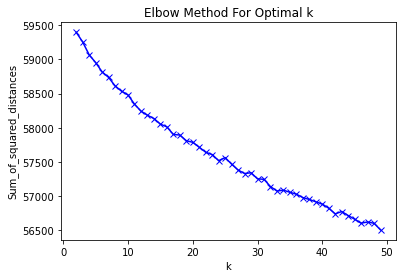

How many clusters do you want to use?
24
                                                   title  cluster
0      nrl panthers warriors broncos roosters scorece...        0
3      olympic cyclist jack bobridge found guilty of ...        0
4      one hour workers one hour employment jobs unem...        0
7                paul keating reflects hawke era reforms        0
9      perth father admits sleepover sexual abuse chi...        0
...                                                  ...      ...
59953        tasmania christmas carnival runner profiles        0
59955  two men injured during castle hill sydney arme...        0
59959  wa families reconsider vic travel plans amid b...        0
59967  whats life like as an american doctor during c...        0
59968  womens shed canberra reskilling unemployed pan...        0

[19854 rows x 2 columns]
                                                   title  cluster
21473  who says new china coronavirus could spread; w...        1
21665  th

In [13]:
K_means_clustering(text)